In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset = pd.read_csv('heat_capacity.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')

In [7]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 150, 200],
    'colsample_bytree': [0.3, 0.5, 0.7, 1.0],
    'alpha': [0, 0.1, 0.5, 1],
    'lambda': [0, 0.1, 0.5, 1]
}


In [8]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [10]:
grid_search = RandomizedSearchCV(estimator=xg_reg, param_distributions=param_grid, n_iter=50,
                                 scoring='neg_mean_squared_error', cv=kf, verbose=1, random_state=42, n_jobs=-1)


In [11]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=Non...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'alpha': [0, 0.1, 0.5, 1],
                                        'colsample_bytree': [0.3, 0.5, 0.7,
                                                             1.0],
                                        'lambda': [0, 0.1, 0.5, 1],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [12]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.1, 'lambda': 0.5, 'colsample_bytree': 1.0, 'alpha': 0}


In [13]:
best_xg_reg = xgb.XGBRegressor(objective='reg:squarederror', **best_params)
best_xg_reg.fit(X_train, y_train)

XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.5, learning_rate=0.1,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [14]:
y_test_pred = best_xg_reg.predict(X_test)
y_train_pred = best_xg_reg.predict(X_train)

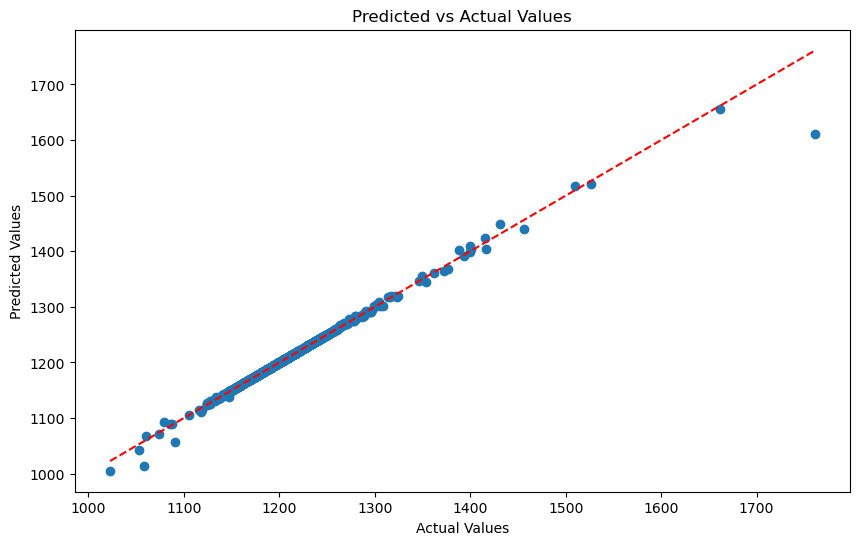

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

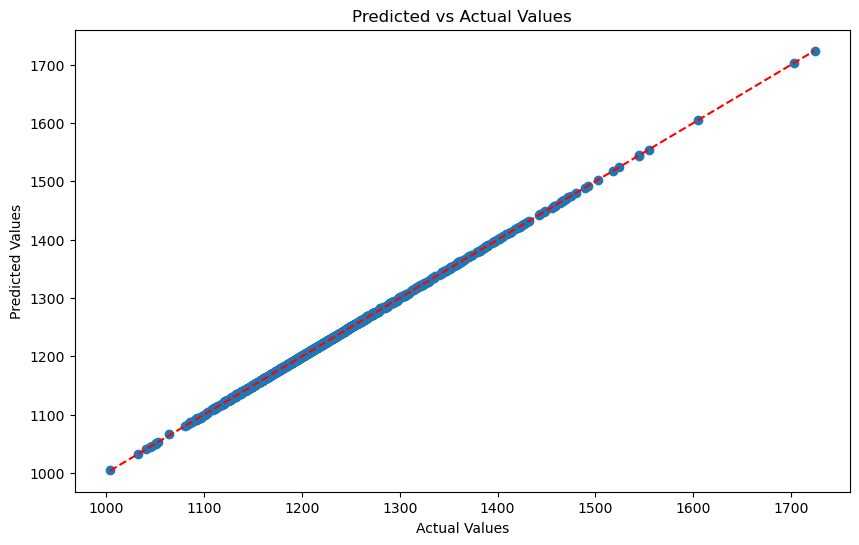

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Line of perfect predictions
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

In [17]:
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100  

# Evaluate the model on the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = mean_absolute_percentage_error(y_train, y_train_pred) * 100  

In [18]:
print("\nTraining Results")
print(f"Mean Squared Error: {train_mse}")
print(f"Root Mean Squared Error: {train_rmse}")
print(f"Mean Absolute Error: {train_mae}")
print(f"R² Score: {train_r2}")
print(f"Mean Absolute Percentage Error: {train_mape} %\n")

print("Testing Results")
print(f"Mean Squared Error: {test_mse}")
print(f"Root Mean Squared Error: {test_rmse}")
print(f"Mean Absolute Error: {test_mae}")
print(f"R² Score: {test_r2}")
print(f"Mean Absolute Percentage Error: {test_mape} %")


Training Results
Mean Squared Error: 0.058026969006862904
Root Mean Squared Error: 0.24088787642150633
Mean Absolute Error: 0.14326764449648194
R² Score: 0.9999649185618622
Mean Absolute Percentage Error: 0.011875892515301047 %

Testing Results
Mean Squared Error: 14.662499701726611
Root Mean Squared Error: 3.829164360761576
Mean Absolute Error: 0.43890411159015585
R² Score: 0.9907850710741497
Mean Absolute Percentage Error: 0.03413811750082193 %


In [19]:
predictions = best_xg_reg.predict(X)

In [20]:
new_df = pd.DataFrame({'Predictions': predictions})
joined_data = dataset.join(new_df)
joined_data.head()

,GR,DPHI,TNPH,TBIT30,DTCO_MPS_FINAL,RHOB,UCS,TIMANI,TZSG,PR,VPVS,YME_STA,DTST_STM_2,C(capa),Predictions
0,133.2880,0.035372,0.061501,85.85635,56.94103,2.591483,16131.45,0.818450,1.103766,0.313236,1.917596,3.802793,211.3686,1202.579264,1202.540283
1,141.2310,0.034830,0.061533,77.46809,56.97847,2.592007,16482.31,0.740217,1.103768,0.310999,1.909318,3.885505,211.2205,1201.007841,1200.911255
2,137.1627,0.030458,0.060160,59.74663,57.15356,2.595690,16911.55,0.642289,1.103769,0.308975,1.901961,3.986692,211.3013,1188.328577,1188.284546
3,140.2624,0.032882,0.059916,61.63119,57.41502,2.594137,17156.11,0.549908,1.103771,0.306235,1.892207,4.044345,210.9722,1195.359221,1195.471924
4,151.1480,0.031895,0.059520,62.33526,57.77623,2.598559,17437.35,0.419688,1.103773,0.303696,1.883367,4.110643,210.9480,1192.495935,1192.384033


In [21]:
dataset_thermal = pd.read_csv('thermal_conductivity.csv')

In [22]:
N = dataset_thermal.iloc[:, 0]
print(N)

0        6008.0
1        6008.5
2        6009.0
3        6009.5
4        6010.0
         ...   
9685    10890.0
9686    10890.5
9687    10891.0
9688    10891.5
9689    10892.0
Name: MD, Length: 9690, dtype: float64


In [23]:
new = pd.DataFrame({'Depth': N})
joined_data = joined_data.join(new)
joined_data.head()

,GR,DPHI,TNPH,TBIT30,DTCO_MPS_FINAL,RHOB,UCS,TIMANI,TZSG,PR,VPVS,YME_STA,DTST_STM_2,C(capa),Predictions,Depth
0,133.2880,0.035372,0.061501,85.85635,56.94103,2.591483,16131.45,0.818450,1.103766,0.313236,1.917596,3.802793,211.3686,1202.579264,1202.540283,6008.0
1,141.2310,0.034830,0.061533,77.46809,56.97847,2.592007,16482.31,0.740217,1.103768,0.310999,1.909318,3.885505,211.2205,1201.007841,1200.911255,6008.5
2,137.1627,0.030458,0.060160,59.74663,57.15356,2.595690,16911.55,0.642289,1.103769,0.308975,1.901961,3.986692,211.3013,1188.328577,1188.284546,6009.0
3,140.2624,0.032882,0.059916,61.63119,57.41502,2.594137,17156.11,0.549908,1.103771,0.306235,1.892207,4.044345,210.9722,1195.359221,1195.471924,6009.5
4,151.1480,0.031895,0.059520,62.33526,57.77623,2.598559,17437.35,0.419688,1.103773,0.303696,1.883367,4.110643,210.9480,1192.495935,1192.384033,6010.0


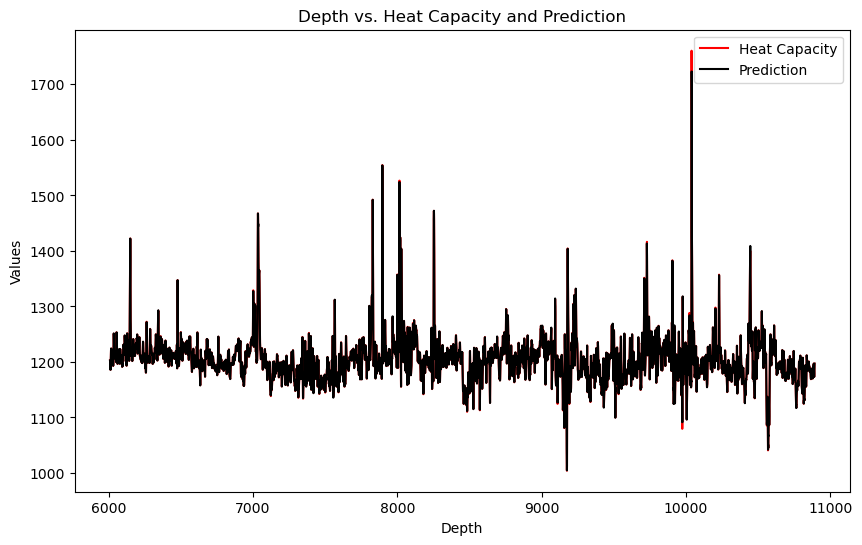

In [24]:
plt.figure(figsize=(10, 6))

# Plotting Heat Capacity vs. Depth
plt.plot(joined_data['Depth'], joined_data['C(capa)'], label='Heat Capacity', color='red')

# Plotting Prediction vs. Depth
plt.plot(joined_data['Depth'], joined_data['Predictions'], label='Prediction', color='black')

# Line of perfect prediction for Heat Capacity (y=x line assuming Prediction ideally matches Heat Capacity)


# Adding labels and legend
plt.xlabel('Depth')
plt.ylabel('Values')
plt.title('Depth vs. Heat Capacity and Prediction')
plt.legend()  # Automatically uses labels from each plot command

# Show the plot
plt.show()